# Comparing the coverage of place search APIs


Data Sources
* Foursquare 'Search for Venue'  API
* Yelp 'Business Search ' API
* Google Map 'Place Search -- Nearby Search' API

Steps
* Build **get** function for each API
* Use for loop work through categories, and concat return DataFrame
* Value_counts categories, and compare results form three APIs

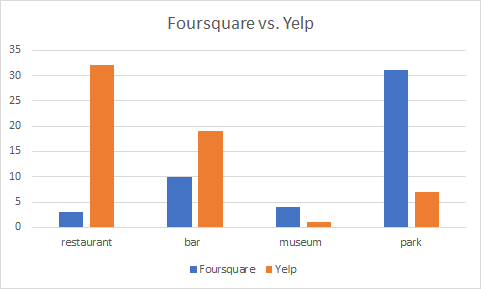

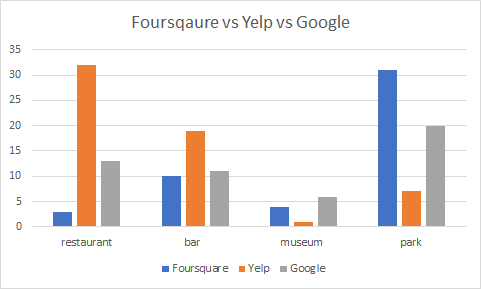

Challenges
* Different APIs have different methods of categorizing and tagging.
* Limitation of accesses and data volumn from APIs. 

In [69]:
import pandas as pd
import numpy as np
import requests as re
import sqlite3
from IPython.display import JSON
import APIkey
import json

In [146]:
#set the keys
foursquare_id = APIkey.FOURSQUARE1['FOURSQUARE_CLIENT_ID']
foursquare_secret = APIkey.FOURSQUARE1['FOURSQUARE_CLIENT_SECRET']

yelp_key = APIkey.YELP['API_KEY']

google_key = APIkey.GOOGLE['KEY']


## Search and get data from Foursquare


In [131]:
def get_venues(location):
    
    # key params
    client_id = foursquare_id
    client_secret = foursquare_secret
    limit = 100
    ll = location
    categoryId = '4bf58dd8d48988d1c4941735'
    radius = 1500
    v = '20210720'
    
    bars ='4bf58dd8d48988d116941735'
    restaurant = '4bf58dd8d48988d1c4941735'
    museum = '4bf58dd8d48988d181941735'
    theme_park = '4bf58dd8d48988d182941735'
    park = '4bf58dd8d48988d163941735'
    
        

    # build endpoint
    url = "https://api.foursquare.com"
    api_method = '/v2/venues/search'
    endpoint = url + api_method
   
    # get data
    res = re.get(endpoint, params={'client_id':client_id, 'client_secret':client_secret,'ll': ll,'categoryId':categoryId,'limit':limit,'radius':radius,'v':v})
    if res.status_code != 200:
        print(f'{location} is wrong, {res.status_code} can not get data.')
        return -1
    response = res.json()
    
    #put data in a DataFrame
    columns = ['y_category','y_name']
    df = pd.DataFrame(columns=columns)
    for i in range(len(response['response']['venues'])):
        df.loc[i] = ['restaurants', response['response']['venues'][i]['name']]
    
    
    return df

In [115]:
columns = ['y_category','y_name']
df_fours = pd.DataFrame(columns=columns)   

In [132]:
ll ='49.161870,-123.165972'
df = get_venues(ll)

In [134]:
df_fours = pd.concat([df_fours,df])

In [145]:
df_fours['y_category'].value_counts()

parks          31
bars           10
museums         4
restaurants     3
Name: y_category, dtype: int64

## Search and get data from Yelp


In [140]:
def get_yelp(lat,lon,categ):
    
    # key params
    headers = {'Authorization': f"Bearer {yelp_key}"}
    latitude = lat
    longitude = lon
    categories= categ
    radius = 1500
    limit = 50
   
    

    # build endpoint
    url = "https://api.yelp.com"
    api_method = '/v3/businesses/search'
    endpoint = url + api_method
    

   
    # get data
    res = re.get(endpoint, headers= headers, params={'latitude':latitude, 'longitude':longitude,'categories':categories,'radius':radius,'limit':limit})
    if res.status_code != 200:
        print(f'There is wrong, {res.status_code} can not get data.')
        return -1
    response = res.json()
    
    #put data in a DataFrame
    columns = ['y_category','y_name']
    df = pd.DataFrame(columns=columns)
    for i in range(len(response['businesses'])):
        df.loc[i] = [categ, response['businesses'][i]['name']]
           
    
    return df

In [138]:
columns = ['y_category','y_name']
df_yelp = pd.DataFrame(columns=columns)
for c in ['bars','museums','parks']:
    df = get_yelp(49.161870, -123.165972,c)
    df_yelp = pd.concat([df_yelp,df])
       

In [141]:
df = get_yelp(49.161870, -123.165972,'restaurants')
df_yelp = pd.concat([df_yelp,df])

In [143]:
df_yelp['y_category'].value_counts()

restaurants    32
bars           19
parks           7
museums         1
Name: y_category, dtype: int64

## Search and get data from Google Map API

In [162]:
def get_googlemap(lat,categ):
    
    # key params
    key = google_key
    location = '49.161870,-123.165972'
    type = categ
    radius = 1500
    
   
    

    # build endpoint
    url = "https://maps.googleapis.com"
    api_method = '/maps/api/place/nearbysearch/json'
    endpoint = url + api_method
    

   
    # get data
    res = re.get(endpoint,  params={'key':key, 'location':location,'type':type,'radius':radius})
    if res.status_code != 200:
        print(f'There is wrong, {res.status_code} can not get data.')
        return -1
    response = res.json()
    
    #put data in a DataFrame
    columns = ['y_category','y_name']
    df = pd.DataFrame(columns=columns)
    for i in range(len(response['results'])):
        df.loc[i] = [categ, response['results'][i]['name']]
        
    
    
    return df

In [160]:
columns = ['y_category','y_name']
df_google = pd.DataFrame(columns=columns)
for c in ['bar','museum','park']:
    df = get_googlemap('49.161870, -123.165972',c)
    df_google = pd.concat([df_google,df])

In [163]:
df = get_googlemap('49.161870, -123.165972','restaurant')
df_google = pd.concat([df_google,df])

In [166]:
df_google['y_category'].value_counts()

park          20
restaurant    13
bar           11
museum         6
Name: y_category, dtype: int64

## Analyze top POIs nearby

In [182]:
 # key params
headers = {'Authorization': f"Bearer {yelp_key}"}
latitude = 49.161870
longitude =  -123.165972
categories= 'restaurants'
radius = 3000
limit = 50
   
    

    # build endpoint
url = "https://api.yelp.com"
api_method = '/v3/businesses/search'
endpoint = url + api_method
    

   
    # get data
res = re.get(endpoint, headers= headers, params={'latitude':latitude, 'longitude':longitude,'categories':categories,'radius':radius,'limit':limit})
response = res.json()

In [184]:

columns = ['y_category','y_name','review_count','rating','latitude','longitude']
df_yelp_rating = pd.DataFrame(columns=columns)
for i in range(len(response['businesses'])):
        df_yelp_rating.loc[i] = ['restaurants', response['businesses'][i]['name'],response['businesses'][i]['review_count'],response['businesses'][i]['rating'],response['businesses'][i]['coordinates']['latitude'],response['businesses'][i]['coordinates']['longitude']]

In [186]:
df_top_restaurant = df_yelp_rating.sort_values(['rating','review_count'], ascending=[False,False]).head(10)

In [188]:
df_top_restaurant['ll'] = df_top_restaurant['latitude'].apply(str) + ',' + df_top_restaurant['longitude'].apply(str)

In [189]:
df_top_restaurant

,y_category,y_name,review_count,rating,latitude,longitude,ll
9,restaurants,Cocoru,163,4.5,49.178466,-123.130374,"49.1784663,-123.1303743"
0,restaurants,Smokehouse Sandwich,152,4.5,49.169840,-123.167490,"49.16984,-123.16749"
4,restaurants,Haidilao,144,4.5,49.170430,-123.136330,"49.17043,-123.13633"
20,restaurants,Sushi Hachi Japanese Restaurant,109,4.5,49.184120,-123.126300,"49.18412,-123.1263"
14,restaurants,Pokey Okey,83,4.5,49.163365,-123.135459,"49.1633651,-123.135459"
39,restaurants,Mr Bro Korean Bistro & Izakaya,63,4.5,49.178175,-123.127902,"49.1781751,-123.127902"
16,restaurants,Katsu San,43,4.5,49.169983,-123.181773,"49.169982779066,-123.181773349643"
1,restaurants,Shanghai River,686,4.0,49.170740,-123.138480,"49.17074,-123.13848"
2,restaurants,Kirin Seafood Restaurant,488,4.0,49.169910,-123.137530,"49.16991,-123.13753"
3,restaurants,HK BBQ Master,410,4.0,49.179607,-123.136875,"49.1796073,-123.1368749"
